# 範例 : (Kaggle)房價預測精簡版 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques
***
- 以下是房價預測的精簡版範例
- 使用最小量的特徵工程以及線性回歸模型做預測, 最後輸出可以在Kaggle提交的預測檔

# [教學目標]
- 以下程式碼雖然與 Day16 類似, 但是主要重點在於特徵工程的使用, 後續的課程當中會教導同學如何對這塊作調整

# [範例重點]
- 精簡後的特徵工程 - 包含補缺失值(fillna). 標籤編碼(LabelEncoder).  
最小最大化(MinMaxScaler) 如何使用在同一個程式區塊中 (In[3])   

## 載入基本套件

In [45]:
import pandas as pd
import numpy as np
"""載入標籤編碼與最小最大化, 以便做最小的特徵工程"""
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
"""繪圖模組"""
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
s = 'dark_background'
plt.style.use(s)

## 讀取文件

In [46]:
"""讀取訓練與測試資料"""
data_path =r'C:\Users\jas72\Python_DS\Dataset\Part02\\'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')
df_test = pd.read_csv(data_path + 'house_test.csv.gz')
print(df_train.shape)

(1460, 81)


## 查看數據(train含目標值/test不含目標值)

In [47]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [48]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 查看目標值(使用 np.log1p讓數據平坦化)並建立train_Y分離數據

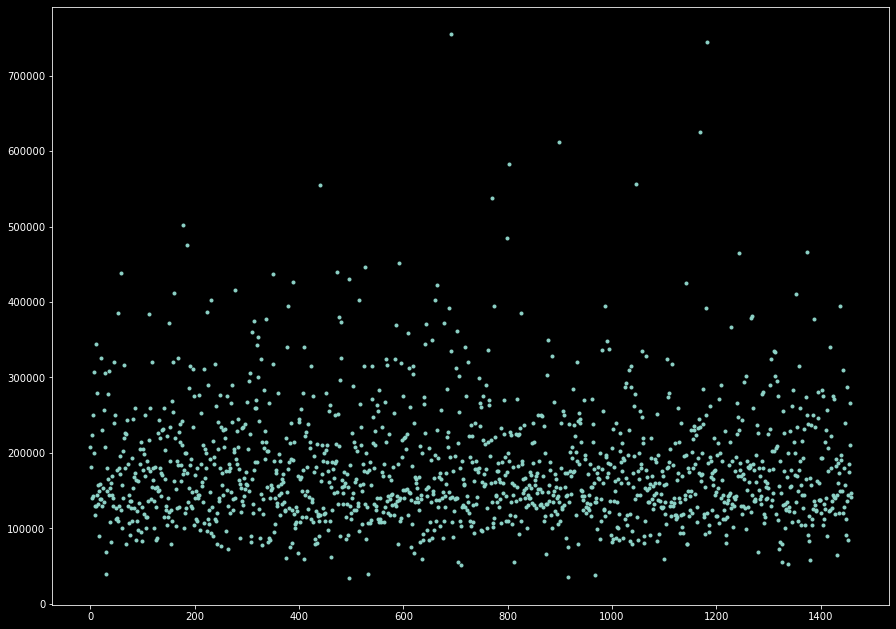

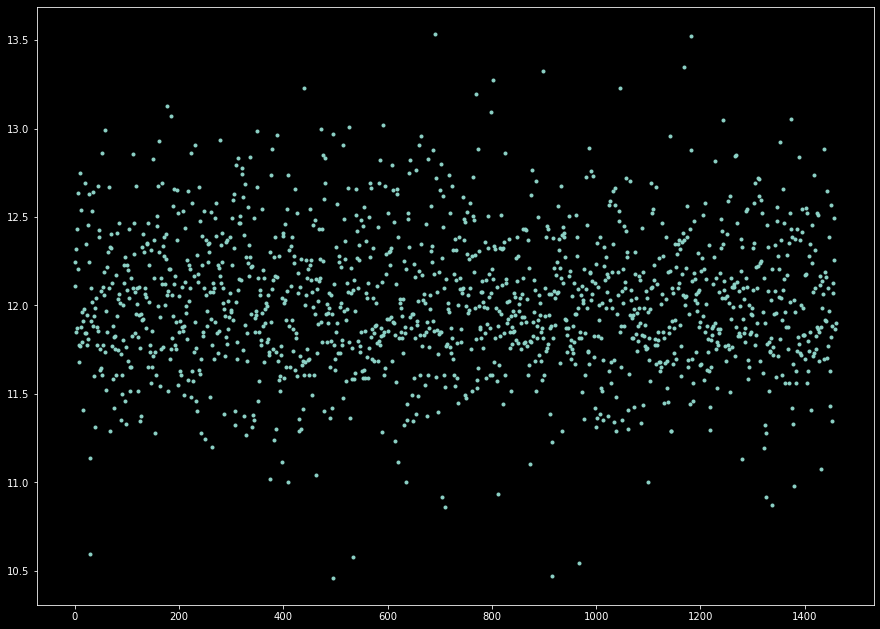

In [49]:
# 理解np.log1p
plt.figure(figsize = (15,11))
plt.plot(df_train['SalePrice'], '.')
plt.show()
#取出目標值
plt.figure(figsize = (15,11))
train_Y = np.log1p(df_train['SalePrice'])
plt.plot(train_Y, '.')
plt.show()

## 去除編號與無意義欄位
## 將train資料內目標值與其分離
## 將TRAIN與TEST的特徵部分合併(因為我們可能會對TRAIN內部特徵做一些統整處理，因此TEST須同步處理)

In [50]:
#取出編號(隊訓練無意義資料)
ids = df_test['Id']
df_train = df_train.drop(['Id', 'SalePrice'] , axis=1)
df_test = df_test.drop(['Id'] , axis=1)
#先合併資料做統籌
df = pd.concat([df_train,df_test])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## 特徵工程-簡化版 : 全部空值先補-1, 所有類別欄位先做 LabelEncoder, 然後再與數字欄位做 MinMaxScaler

In [51]:
"""這邊使用 LabelEncoder 只是先將類別欄位用統一方式轉成數值以便輸入模型, 當然部分欄位做 One-Hot可能會更好, 只是先使用最簡單版本作為範例"""
LEncoder = LabelEncoder()
"""除上述之外, 還要把標籤編碼與數值欄位一起做最大最小化, 這麼做雖然有些暴力, 卻可以最簡單的平衡特徵間影響力"""
MMEncoder = MinMaxScaler()
for c in df.columns:
    if df[c].dtype == 'object': # 如果是文字型 / 類別型欄位, 就先補缺 'None' 後, 再做標籤編碼
        df[c] = df[c].fillna('None')
        df[c] = LEncoder.fit_transform(df[c]) 
    else: # 其他狀況(本例其他都是數值), 就補缺 -1
        df[c] = df[c].fillna(-1)
    # 最後, 將標籤編碼與數值欄位一起最大最小化, 因為需要是一維陣列, 所以這邊切出來後用 reshape 降維
    df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1, 1))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,0.8,0.210191,0.033420,1.0,0.5,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.25,0.0,0.090909,0.50,1.0,0.8
1,0.000000,0.8,0.257962,0.038795,1.0,0.5,1.0,1.0,0.0,0.5,...,0.0,0.0,1.0,1.0,0.25,0.0,0.363636,0.25,1.0,0.8
2,0.235294,0.8,0.219745,0.046507,1.0,0.5,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.25,0.0,0.727273,0.50,1.0,0.8
3,0.294118,0.8,0.194268,0.038561,1.0,0.5,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.25,0.0,0.090909,0.00,1.0,0.0
4,0.235294,0.8,0.270701,0.060576,1.0,0.5,0.0,1.0,0.0,0.5,...,0.0,0.0,1.0,1.0,0.25,0.0,1.000000,0.50,1.0,0.8


#### 將前述轉換完畢資料 df , 重新切成 train_X, test_X, 因為不論何種特徵工程, 都需要對 train / test 做同樣處理
#### 常見並簡便的方式就是 - 先將 train / test 接起來, 做完後再拆開, 不然過程當中往往需要將特徵工程部分寫兩次, 麻煩且容易遺漏
#### 在較複雜的特徵工程中尤其如此, 若實務上如果碰到 train 與 test 需要分階段進行, 則通常會另外寫成函數處理

In [52]:
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

## 使用線性迴歸模型 : train_X, train_Y 訓練模型, 並對 test_X 做出預測結果 pred(如有用平坦化須將其轉回)

In [53]:
from sklearn.linear_model import LinearRegression
estimator = LinearRegression()
estimator.fit(train_X, train_Y)
pred = estimator.predict(test_X)
pred = np.expm1(pred)

C:\Users\jas72\Anaconda3\envs\TensorFlow2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in expm1
  """


## 將輸出結果 pred 與前面留下的 ID(ids) 合併, 輸出成檔案
## 可以下載並點開 house_baseline.csv 查看結果, 以便了解預測結果的輸出格式
## 本範例所與作業所輸出的 csv 檔, 均可用於本題的 Kaggle 答案上傳, 可以試著上傳來熟悉 Kaggle 的介面操作

In [57]:
sub = pd.DataFrame({'Id': ids, 'SalePrice': pred})
sub[sub['SalePrice']==np.inf]['SalePrice']

660    inf
Name: SalePrice, dtype: float64

#### 檢查預測值是否有歧異並使用均值取代

In [59]:
sub.loc[sub['SalePrice']==np.inf,['SalePrice']]=np.mean(list(filter(lambda x: x != np.inf, sub['SalePrice'])))

In [60]:
sub.to_csv('house_baseline.csv', index=False) 

In [63]:
list(filter(lambda x: x != np.inf, sub['SalePrice']))

[113725.4537953444,
 156209.99701394822,
 163158.2986753499,
 195184.39261101803,
 184425.6592432021,
 169758.35358032337,
 186481.10222639065,
 166398.56258167626,
 190069.56591320806,
 116599.74121657318,
 189964.75543605257,
 106902.29357079836,
 98454.82402724533,
 150016.52463809642,
 119608.76681202094,
 341308.796876036,
 235910.16062411648,
 290596.2121435223,
 277626.9708822924,
 457181.1837136018,
 300669.55874529073,
 203020.05762732594,
 172815.5087380211,
 167290.8457997811,
 199919.90495322563,
 200787.07017453713,
 304269.65799460944,
 231231.12719624263,
 182183.10687492436,
 224485.28428155291,
 199394.2698913755,
 90505.20630925141,
 203025.06750231935,
 292274.790306593,
 270211.36385919165,
 223671.78022939397,
 170635.76271343874,
 167324.84165739585,
 165128.13682784385,
 160616.6372037339,
 166923.78909118357,
 156775.37000717898,
 288123.90960999206,
 245250.5050733586,
 223487.70863741753,
 196487.0816334778,
 236157.66556344117,
 193757.38990470016,
 154677.99